<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 ICA 2 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due March 28, 2025 </b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Spring 2025
</font>
</center>








## Your Name: Meg Bucich

## Your ID: 131787276

## 1. Summary

(1) We were asked to run code that was already provided and just changed 2 values. (2) we did a series of steps with the recursive formula for the Fibonacci sequence where we computed the golden ratio and also approximated it using e. (3) We used backpropagation to compute a deriavtive (chain rule) then were asked to use sympy to compute the derivative of a partial and plot it. (4) we were asked to run a code and explain its results. (5) We had to use the provide code the illustrate the differences of pass by reference and pass by value.

## 2. Methodology

(1) All i did was change the numbers as asked. (2) We used markdown to complete this using a series of basic arithemetric and careful evaluation. (3). I used the quotient rule to take the derivative of the needed term. I used sympy to symbolically compute the derivative and used lambdify to plot my results by converting from sympy to numpy to use matplotlib.(4) I used my knowlegde of what numerical value $\Phi$ is and considered what $log_{10}(\Phi)$ might be and used that to analzye the resulting graphs. (5) I used ran a series of code to show how the original variable changes or stays the same based on how we reference it using other variables. 

## 3. Code and Results (e.g., Tables, Figures, Outputs)

### Results for Question 1

see attached google collab document

### Results for Question 2

plugging $$Z_{n} = \lambda^{n}$$ in for $$Z_{n+1} = Z_{n-1} + Z_{n}$$ we get 
$$\lambda^{n+1} = \lambda^{n-1} + \lambda^{n}$$ dividing both sides by $\lambda_{n-1}$ we get $$\lambda^{2} = \lambda + 1$$ moving everything over to the left hand side we now have $$\lambda^{2} - \lambda - 1 = 0$$ which is a quadratic so it has 2 roots. Using the quadratic equation, our roots are $$\frac{1 \pm \sqrt{1^{2}-4(1)(-1)}}{2(1)}$$  which simplifies to $$\frac{1 \pm \sqrt{5}}{2}$$. so $$\lambda_{1} = \frac{1 + \sqrt{5}}{2}$$ (the golden ratio) as well as $$\lambda_{2} = \frac{1 - \sqrt{5}}{2}$$. After discretization, $t = m\Delta t$ we get the equation $$Z(m\Delta t) = Z_{0}e^{\sigma m \Delta t}$$. This means that $$Z_{m+1} = Z_{0}e^{\sigma (m+1) \Delta t}$$. If we divide both sides of the equation by $Z_{m}$ where $Z_{m} = Z_{0}e^{\sigma m \Delta t}$, we have $$\frac{Z_{m+1}}{Z_{m}} = \frac{Z_{0}e^{\sigma (m+1) \Delta t}}{Z_{m} = Z_{0}e^{\sigma m \Delta t}}$$ which simplies to $e^{\sigma \Delta t}$. Therefore, we have $$\frac{Z_{m+1}}{Z_{m}} = e^{\sigma \Delta t}$$. Using $\sigma \Delta t = \frac{1}{2}$, we get $e^{1}{2} \approx \Phi (\frac{1 + \sqrt{5}}{2}) $

### Results for Question 3

### From homework 7 #3
$\frac{\partial L}{\partial w_{1}} = -(q-\hat{q}) \frac{e^{-z}}{(1+e^{-z})^{2}} w_{3} \frac{e^{-x}}{(1+e^{-x})^{2}} * u$
where $$\frac{\partial a}{\partial x} = \frac{e^{-x}}{(1+e^{-x})^{2}}$$

-exp(-x)/(1 + exp(-x))**2 + 2*exp(-2*x)/(1 + exp(-x))**3

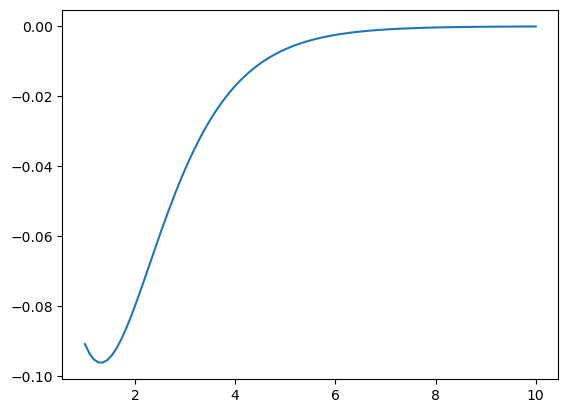

In [83]:
import sympy as sp
import IPython.display as IPy
x = sp.symbols('x')
partial_a = (sp.exp(-x))/((1+sp.exp(-x))**2)
derivative = sp.diff(partial_a)
IPy.display(derivative)
derivative_func = sp.lambdify(x, derivative, 'numpy')
y_values = y_values = derivative_func(x_values)
x_values = np.linspace(1,10,100)
plt.plot(x_values,y_values)


### Results for Question 4

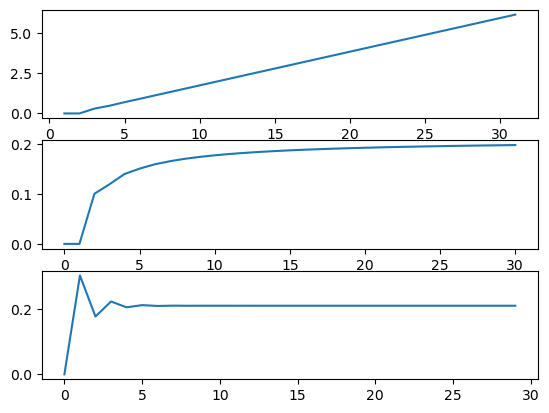

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def fibo_seq_array(n):
    pn = np.ones(n+1,dtype = np.int64)
    if n>= 2:
        for jj in range(2,n+1):
            pn[jj] = pn[jj - 1] + pn[jj - 2]
    return pn
Num = 30
y = fibo_seq_array(Num)
x = np.arange(1,Num+2)
ylog = np.log10(y)

plt.subplot(3,1,1)
plt.plot(x,ylog)
plt.subplot(3,1,2)
plt.plot(ylog/x)
plt.subplot(3,1,3)
plt.plot((ylog[1:] - ylog[0:-1])/(x[1]-x[0]))
plt.show()

The first plot is x values from 0,30 and we plotted their fibonacci number on a log scale. It gives a straight line which i assume has a slope of the golden ratio (dont know though). Its a linear line becasue the sequence grows exponentially, so taking the log of an exponent should give us something linear. The second plot is plotting x versus the log of its fibonacci number divided by x. This plot levels off around $log_{10} (\Phi)$. The third plot approximate the growth rate of the sequence and since we plotted it log, we also see that it flattens out right around $log_{10} (\Phi)$ as well. 

### Results for Question 5

In [16]:
a = [1,2,3]
c1 = a #a reference to a. any modifications to c1 will also modify a 
c1[1] = 4
print(c1)
print(a)


[1, 4, 3]
[1, 4, 3]


I changed the second element of c1 to be 4, which then changes the second element of a to also be 4. This is because we made c1 a reference to a. Any modifications to c1 will also modify a.

In [28]:
a = [1,2,3]
c2 = a[:] #a shallow copy, creates a new object but does not recursively copy nested mutable objects
c2[1] = 5
print(c2)
print(a)

[1, 5, 3]
[1, 2, 3]


I changed the second element of c2 to be 5, but this does not change the second element of a. This is becasue c2 is a shallow copy of a. This creates a new object but does not recursively copy nested mutable objects. 

In [22]:
import numpy as np
b = np.arange(1,4,1)
c3 = b
c3[1] = 6
print(c3)
print(b)

[1 6 3]
[1 6 3]


same thing as part 1. changes to c3 will also be changed to b. This is a reference to b. 

In [24]:
b = np.arange(1,4,1)
c4 = b[:]
c4[1] = 7
print(c4)
print(b)

[1 7 3]
[1 7 3]


this is the same thing as a reference 

In [26]:
b = np.arange(1,4,1)
c5 = b.copy()
c5[1] = 8
print(c5)
print(b)

[1 8 3]
[1 2 3]
